#Problem Statement



*   The authenticity of Information has become a longstanding issue affecting businesses and society, both for printed and digital media.
*   On social networks, the reach and effects of information spread occur at such a fast pace and so amplified that distorted, inaccurate, or false information acquires a tremendous potential to cause real-world impacts, within minutes, for millions of users.
*   On social networks, the reach and effects of information spread occur at such a fast pace and so amplified that distorted, inaccurate, or false information acquires a tremendous potential to cause real-world impacts, within minutes, for millions of users.
*   Recently, several public concerns about this problem and some approaches to mitigate the problem were expressed. 

#Objective

*    Build a model to predict whether a news is fake or not fake.
*    Evaluate their performance, and finally report the best model you got on the data and its performance.




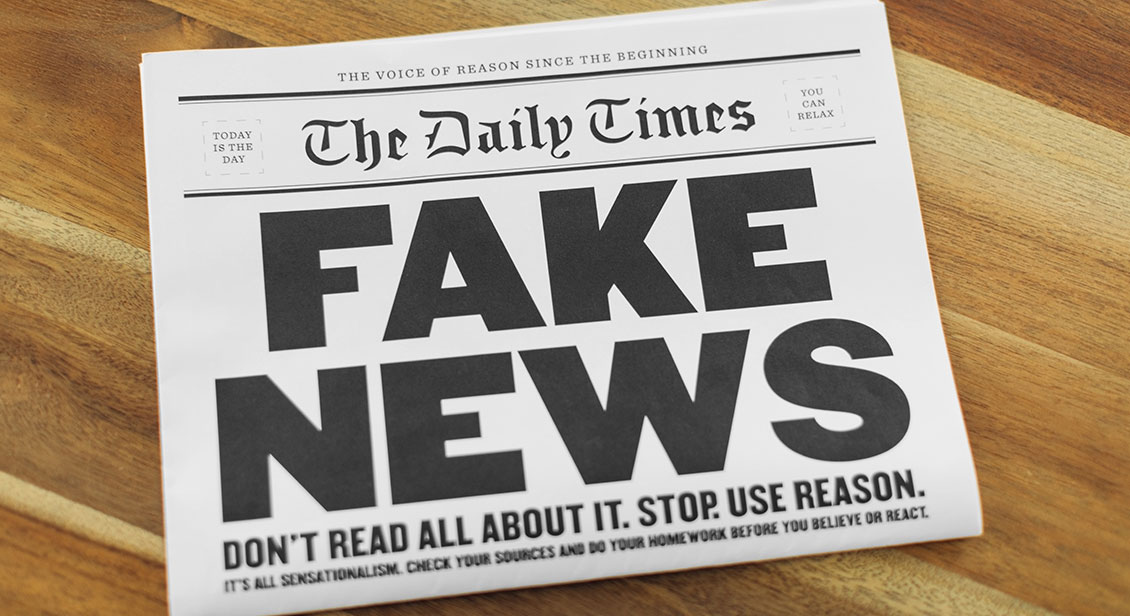

#Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import spacy
import sklearn
import random
import operator
import math
import tqdm
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded=files.upload()

Saving train_news.csv to train_news.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['train_news.csv']))
df.head(10)

,Unnamed: 0,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1
5,5,3196,Whatever the Outcome on November 8th the US Wi...,NaN,Taming the corporate media beast Whatever the ...,1
6,6,5134,Rapid Evolution Saved This Fish From Pollution...,JoAnna Klein,The State of New Jersey says you can’t eat the...,0
7,7,1504,Alabama Prison Officials Retaliate Against Pri...,Brian Sonenstein,Advocates say prison officials at the Kilby Co...,1
8,8,13559,NaN,steventexas,People have made up their minds on president.\...,1
9,9,4203,Can We Live in a Constant State of Love?,Gillian,Leave a reply \nToni Emerson – When we fall in...,1


#Dataset Description
There are 6 columns in the dataset provided to us. The description of each of the column is given below:

*   “id”:  Unique id of each news article
*   “headline”:  It is the title of the news.

*   “news”:  It contains the full text of the news article
*   “Unnamed:0”:  It is a serial number

*   “written_by”:  It represents the author of the news article
*   “label”:  It tells whether the news is fake (1) or not fake (0)







#Basic statistics of our Dataset

In [4]:
#Basic Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  20800 non-null  int64 
 1   id          20800 non-null  int64 
 2   headline    20242 non-null  object
 3   written_by  18843 non-null  object
 4   news        20761 non-null  object
 5   label       20800 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 975.1+ KB


In [5]:
#Data Types
df.dtypes

Unnamed: 0     int64
id             int64
headline      object
written_by    object
news          object
label          int64
dtype: object

In [6]:
#Number of rows and columns
df.shape

(20800, 6)

In [7]:
#Column Names
df.columns

Index(['Unnamed: 0', 'id', 'headline', 'written_by', 'news', 'label'], dtype='object')

#Finding Missing Values

In [8]:
df.isnull().sum()

Unnamed: 0       0
id               0
headline       558
written_by    1957
news            39
label            0
dtype: int64

Observation


*   Here we see Missing values in column **headline,written_by,news**
*   So droping of missing values is required



In [9]:
#Removing NaN values
df.dropna(axis="rows",inplace=True)
df

,Unnamed: 0,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1
...,...,...,...,...,...,...
20794,20794,366,One Police Shift: Patrolling an Anxious Americ...,The New York Times,Policing in America today is a rib dinner paid...,0
20796,20796,14831,Albert Pike and the European Migrant Crisis,Rixon Stewart,"By Rixon Stewart on November 5, 2016 Rixon Ste...",1
20797,20797,18142,Dakota Access Caught Infiltrating Protests to ...,Eddy Lavine,posted by Eddie You know the Dakota Access Pip...,1
20798,20798,12139,How to Stretch the Summer Solstice - The New Y...,Alison S. Cohn,"It’s officially summer, and the Society Boutiq...",0


In [10]:
df.head(10)

,Unnamed: 0,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1
6,6,5134,Rapid Evolution Saved This Fish From Pollution...,JoAnna Klein,The State of New Jersey says you can’t eat the...,0
7,7,1504,Alabama Prison Officials Retaliate Against Pri...,Brian Sonenstein,Advocates say prison officials at the Kilby Co...,1
9,9,4203,Can We Live in a Constant State of Love?,Gillian,Leave a reply \nToni Emerson – When we fall in...,1
10,10,11136,Is Hillary a Closet Drunk… New WikiLeak Email ...,V Saxena,BREAKING: Clinton Fixer Reveals Sick Smear Hil...,1
11,11,2150,BLOOMBERG-BACKED PENNSYLVANIA ATTORNEY GENERAL...,Iron Sheik,Home › POLITICS | US NEWS › BLOOMBERG-BACKED P...,1


In [11]:
#Resetting the index
message=df.copy()
message.reset_index(inplace=True)
message.head(10)

,index,Unnamed: 0,id,headline,written_by,news,label
0,0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1
5,6,6,5134,Rapid Evolution Saved This Fish From Pollution...,JoAnna Klein,The State of New Jersey says you can’t eat the...,0
6,7,7,1504,Alabama Prison Officials Retaliate Against Pri...,Brian Sonenstein,Advocates say prison officials at the Kilby Co...,1
7,9,9,4203,Can We Live in a Constant State of Love?,Gillian,Leave a reply \nToni Emerson – When we fall in...,1
8,10,10,11136,Is Hillary a Closet Drunk… New WikiLeak Email ...,V Saxena,BREAKING: Clinton Fixer Reveals Sick Smear Hil...,1
9,11,11,2150,BLOOMBERG-BACKED PENNSYLVANIA ATTORNEY GENERAL...,Iron Sheik,Home › POLITICS | US NEWS › BLOOMBERG-BACKED P...,1


In [12]:
message.isnull().sum()

index         0
Unnamed: 0    0
id            0
headline      0
written_by    0
news          0
label         0
dtype: int64

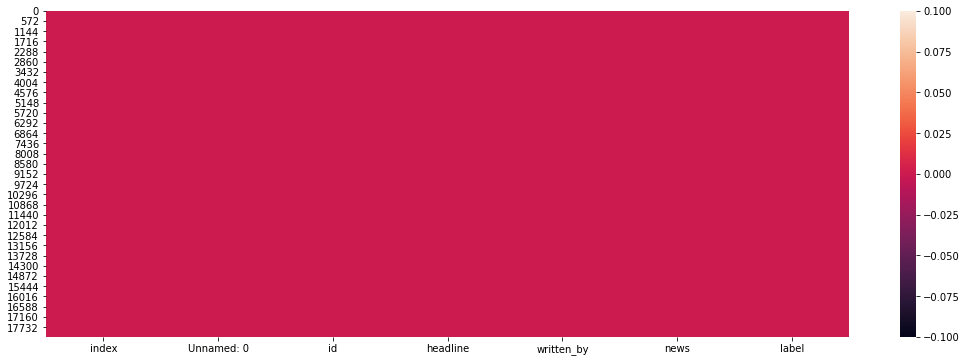

In [13]:
#Graphical Representation
#Heatmap
plt.figure(figsize=(18,6))
sns.heatmap(message.isnull())

#seperating Dependent and Independent Features 

In [14]:
x=message.drop("label",axis=1)
x.head()

,index,Unnamed: 0,id,headline,written_by,news
0,0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo..."
1,1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...
2,2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ..."
3,3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g..."
4,4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...


In [15]:
y=message["label"]
y.head()


0    0
1    0
2    0
3    0
4    1
Name: label, dtype: int64

#EDA

Analytical Exploration of Label

In [16]:
#Column Label
message.groupby('label').size()

label
0    10361
1     7924
dtype: int64

Visualization

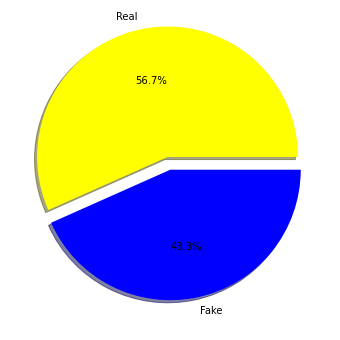

In [17]:
#Visuvalization
plt.figure(figsize=(8,6))
sizes = [10361,7924]
labels = ['Real','Fake']
colors = ['yellow', 'blue']
explode = [0.1,0]
plt.pie(sizes,labels= labels,colors= colors,explode = explode, autopct = '%1.1f%%',shadow = True)
plt.show()

Analytical Exploration on Feature **"Written_by"**

In [18]:
df["written_by"].value_counts()

Pam Key                                               243
admin                                                 193
Jerome Hudson                                         166
Charlie Spiering                                      141
John Hayward                                          140
                                                     ... 
John Eligon, Serge F. Kovaleski and Joe Coscarelli      1
AssHat900                                               1
Adrian Bamforth                                         1
Penn Bullock and Sandra Stevenson                       1
Judge Andrew Napolitano                                 1
Name: written_by, Length: 3838, dtype: int64

#Data PreProcessing

Concatinating all text from the dataset

In [19]:
df["content"]=df["headline"]+" "+df["written_by"]+" "+df["news"]
df.head(5)

,Unnamed: 0,id,headline,written_by,news,label,content
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0,Ethics Questions Dogged Agriculture Nominee as...
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0,U.S. Must Dig Deep to Stop Argentina’s Lionel ...
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0,Cotton to House: ’Do Not Walk the Plank and Vo...
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0,"Paul LePage, Besieged Maine Governor, Sends Co..."
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1,A Digital 9/11 If Trump Wins Finian Cunningham...


Calculating total length

In [20]:
#creating column to find the total length of the Words
df['content_word_len'] = df['content'].apply(lambda x: len(x.split()))

#creating column to find the total length of the characters
df['content_char_len'] = df['content'].str.len()

In [21]:
df.head(2)

,Unnamed: 0,id,headline,written_by,news,label,content,content_word_len,content_char_len
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0,Ethics Questions Dogged Agriculture Nominee as...,1360,8048
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,1066,6201


#Exploration of feature "**content**"

In [22]:
real = df[df.label == 0]['content'].apply(lambda x: len(x.split()))
fake = df[df.label == 1]['content'].apply(lambda x: len(x.split()))

Text(0.5, 1.0, 'length in terms of word count')

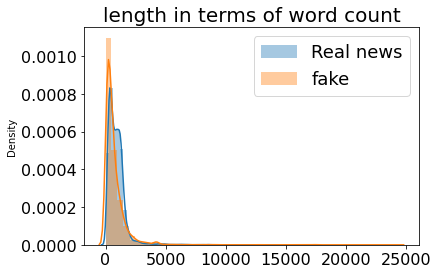

In [23]:
#displacement graph
sns.distplot(real, label='Real news')
sns.distplot(fake, label='fake')
plt.legend(fontsize=18)
plt.xlabel(None)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("length in terms of word count", fontsize=20)

#Preprocessing the **content** column

1st Let see how the content column looks like

In [24]:
#index 0
df["content"][0]

'Ethics Questions Dogged Agriculture Nominee as Georgia Governor - The New York Times Eric Lipton and Steve Eder WASHINGTON  —   In Sonny Perdue’s telling, Georgians were growing weary of the corruption and scandals in their state when he took over as governor in 2003  —   a time when he gave his own version of a “drain the swamp” pledge. “My first goal as governor is to restore public trust in state government by changing the culture of state government,” Mr. Perdue told a leadership conference at Kennesaw State University in April 2003. “Our form of government depends on a mutual bond of trust between the people and their government. But people have become cynical about their government. ” But Mr. Perdue, a Republican who is awaiting confirmation to serve as President Trump’s agriculture secretary, became a target of frequent criticism that he was failing to honor his own ethics pledge during his eight years as governor. The criticism centers on the fact that, as Mr. Trump has, he co

In [25]:
#index 1
df["content"][1]

'U.S. Must Dig Deep to Stop Argentina’s Lionel Messi - The New York Times David Waldstein HOUSTON  —   Venezuela had a plan. It was a tactical approach, designed specifically to take Lionel Messi and the other dangerous Argentine attackers out of the game by applying forward pressure and forcing Argentina to make long, hopeful passes. And it worked for about seven minutes. But in the eighth minute, Messi conjured the kind of technical genius that compels most observers to call him the best soccer player in the world, artfully lifting a perfect pass about 15 yards in to Gonzalo Higuaín. With one striking touch, Higuaín converted it into a goal, the first in Argentina’s   victory on Saturday in a Copa América Centenario quarterfinal. In that decisive moment, like so many others experienced by opponents hoping to stop Messi, all of Venezuela’s carefully conceived defensive tactics were laid to waste. “They have that stroke of genius that changes all your schemes,” Venezuela Coach Rafael D

**Observation**

*   The contents are dirty with **values, symbols, numbers** that will not be useful for analysis. We will be removing these further down the pipeline.

**Preprocessing**

Preprocessing involved the following steps

* Removing Punctuations and other special characters
* Splitting the comments into individual words
* Removing Stop Words
* Lemmatising
* Applying Count Vectoriser
* Splitting dataset into Training and Testing



In [31]:
import re
import string
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

In [27]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [28]:
df

,Unnamed: 0,id,headline,written_by,news,label,content,content_word_len,content_char_len
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0,Ethics Questions Dogged Agriculture Nominee as...,1360,8048
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,1066,6201
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0,Cotton to House: ’Do Not Walk the Plank and Vo...,102,534
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0,"Paul LePage, Besieged Maine Governor, Sends Co...",1120,6630
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1,A Digital 9/11 If Trump Wins Finian Cunningham...,1450,9211
...,...,...,...,...,...,...,...,...,...
20794,20794,366,One Police Shift: Patrolling an Anxious Americ...,The New York Times,Policing in America today is a rib dinner paid...,0,One Police Shift: Patrolling an Anxious Americ...,3545,19982
20796,20796,14831,Albert Pike and the European Migrant Crisis,Rixon Stewart,"By Rixon Stewart on November 5, 2016 Rixon Ste...",1,Albert Pike and the European Migrant Crisis Ri...,1128,6679
20797,20797,18142,Dakota Access Caught Infiltrating Protests to ...,Eddy Lavine,posted by Eddie You know the Dakota Access Pip...,1,Dakota Access Caught Infiltrating Protests to ...,559,3530
20798,20798,12139,How to Stretch the Summer Solstice - The New Y...,Alison S. Cohn,"It’s officially summer, and the Society Boutiq...",0,How to Stretch the Summer Solstice - The New Y...,403,2405


In [29]:
wordnet = WordNetLemmatizer()
def lemmatize(content):
  #removing Puntuations and symbols
  words = re.sub('[^a-zA-Z]', ' ',content)
  #Replacing all characters to lower case
  words = words.lower()
  #Spilitting every words
  words = words.split()
  #Removing stopwords and lemmatizing
  words = [wordnet.lemmatize(word) for word in words if not word in stopwords.words('english')]
  words = ' '.join(words)
  return words

In [32]:
df['content'] = df['content'].apply(lemmatize)

In [33]:
df['content'][0]

'ethic question dogged agriculture nominee georgia governor new york time eric lipton steve eder washington sonny perdue telling georgian growing weary corruption scandal state took governor time gave version drain swamp pledge first goal governor restore public trust state government changing culture state government mr perdue told leadership conference kennesaw state university april form government depends mutual bond trust people government people become cynical government mr perdue republican awaiting confirmation serve president trump agriculture secretary became target frequent criticism failing honor ethic pledge eight year governor criticism center fact mr trump continued help run family business venture four company serving governor mr perdue one last cabinet member awaiting senate confirmation date set confirmation hearing holdup release paperwork accompanying nomination federal office government ethic blamed delay office must examine mr perdue proposal avoid conflict intere

In [34]:
#creating column to find the total length of the cleaned Words
df['clean_content_word_len'] = df['content'].apply(lambda x: len(x.split()))

#creating column to find the total length of the cleaned characters
df['clean_content_char_len'] = df['content'].str.len()

df.head(2)

,Unnamed: 0,id,headline,written_by,news,label,content,content_word_len,content_char_len,clean_content_word_len,clean_content_char_len
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0,ethic question dogged agriculture nominee geor...,1360,8048,737,5342
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0,u must dig deep stop argentina lionel messi ne...,1066,6201,586,4012


In [35]:
print('Original Length of text', df.content_word_len.sum())
print('Clean Length of text', df.clean_content_word_len.sum())
print('Original Length of character', df.content_char_len.sum())
print('Clean Length of character', df.clean_content_char_len.sum())

Original Length of text 14958162
Clean Length of text 8295593
Original Length of character 89456971
Clean Length of character 59435309


#WORD CLOUD
* Creating word cloud to show the words which occur most frequently

In [36]:
import wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords

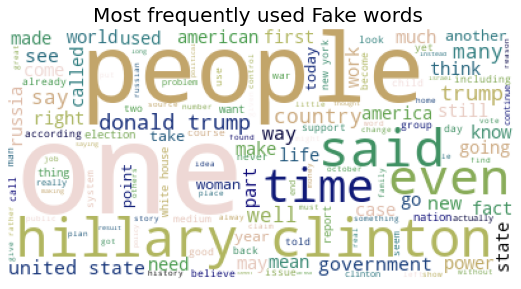

In [37]:
# Print frequently used Fake news words
subset=df[df['label']==1]
text=subset.content.values
wc= WordCloud(background_color="white",max_words=4000)

wc.generate(" ".join(text))

plt.figure(figsize=(20,20))
plt.subplot(221)
plt.axis("off")
plt.title("Most frequently used Fake words ", fontsize=20)
plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)

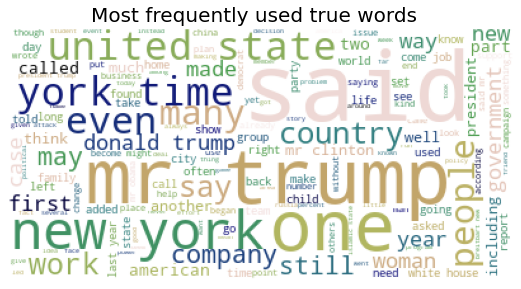

In [38]:
# Print frequently used not Fake news words
subset=df[df['label']==0]
text=subset.content.values
wc= WordCloud(background_color="white",max_words=4000)

wc.generate(" ".join(text))

plt.figure(figsize=(20,20))
plt.subplot(221)
plt.axis("off")
plt.title("Most frequently used true words  ", fontsize=20)
plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)

In [39]:
x = df['content'].values
y = df['label']
print(x.shape , y.shape)

(18285,) (18285,)


In [40]:
# converting the textual data to numerical data
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
x=vectorizer.fit_transform(x)

#Importing Relevant Libraries

In [41]:
# Import packages for pre-processing
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics

# Import tools to split data and evaluate model performance
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import f1_score, precision_score, recall_score, precision_recall_curve, fbeta_score, confusion_matrix,plot_confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

# Import ML algos
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
bnb = BernoulliNB()
mnb = MultinomialNB()
from sklearn.svm import LinearSVC
svm = LinearSVC()
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier(n_estimators=100, random_state=42)

#Train and Test split

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,stratify=y, random_state=42)

In [43]:
x_train.shape, x_test.shape, y_train.shape,y_test.shape

((14628, 130158), (3657, 130158), (14628,), (3657,))

the score of  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is
training accuracy score  : 97.94230243368882
testing accuracy score  : 95.70686354935741


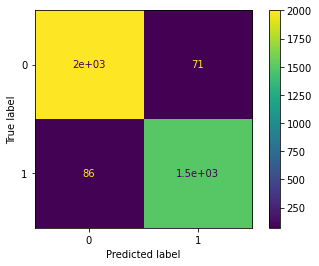

**********************************************************



the score of  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') is
training accuracy score  : 54.2931364506426
testing accuracy score  : 51.46294777139732


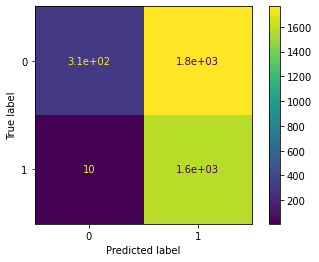

**********************************************************



the score of  BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True) is
training accuracy score  : 84.01011758271808
testing accuracy score  : 79.71014492753623


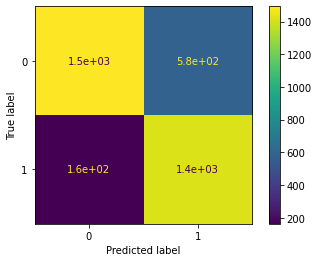

**********************************************************



the score of  MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) is
training accuracy score  : 82.46513535684987
testing accuracy score  : 79.4640415641236


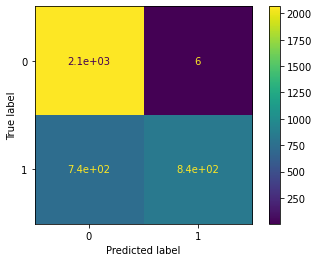

**********************************************************



the score of  LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0) is
training accuracy score  : 99.94531036368608
testing accuracy score  : 97.56631118403062


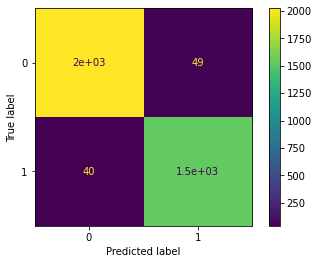

**********************************************************





In [44]:
model=[lr,knn,bnb,mnb,svm]
for m in model:
    m.fit(x_train,y_train)
    pred_train=m.predict(x_train)
    pred_test=m.predict(x_test)
    plot_confusion_matrix(m, x_test, y_test)
    print("the score of ",m,"is")
    print("training accuracy score  :",accuracy_score(y_train,pred_train)*100)
    print("testing accuracy score  :",accuracy_score(y_test,pred_test)*100)
    plt.show()
    print("**********************************************************")
    print("\n\n")

In [45]:
model=[lr,knn,bnb,mnb,svm]
for m in model:
    m.fit(x_train,y_train)
    pred_train=m.predict(x_train)
    pred_test=m.predict(x_test)
    print("Report of ",m, "is")
    print("F1 score \n",f1_score(y_test,pred_test)*100)
    print("classification_report  \n",classification_report(y_test,pred_test))

Report of  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is
F1 score 
 0.9502377179080823
classification_report  
               precision    recall  f1-score   support

           0       0.96      0.97      0.96      2072
           1       0.95      0.95      0.95      1585

    accuracy                           0.96      3657
   macro avg       0.96      0.96      0.96      3657
weighted avg       0.96      0.96      0.96      3657

Report of  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') is
F1 score 
 0.6395939086294415
classification_report  
               precisio

Obseravtion:


*   From the accuracy score and confusion matrix we infer that **Logistic Regression and LinerSVC** model performs well
*   Here we select **LinearSVC as our final Model** 

LinearSVC


*   Training accuracy:**99.94**
*   Testing accuracy: **97.56**
*   F1 score: **97.20**










#HyperTuning

In [54]:
#Hyper parameter Tuning
#Linear Support Vector Classification
#using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
parameters={"C" :[0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
            "random_state": list(range(0,10)),
            "max_iter": [2,3,4,5,6,7,8],
            "penalty":["l1","l2"],
            "loss":["hinge", "squared_hinge"]}
svm = LinearSVC()
clf=GridSearchCV(svm,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'C': 1.0, 'loss': 'squared_hinge', 'max_iter': 8, 'penalty': 'l2', 'random_state': 6}


In [67]:
#cross validating 
#Linear Support Vector Classification
#cross-validating for checking upper/lower cutting
from sklearn.model_selection import cross_val_score
svm.fit(x_train,y_train)
pred_train=svm.predict(x_train)
pred_test=svm.predict(x_test)
accuracy=accuracy_score(y_test,pred_test)
for i in range(2,10):
    cr=cross_val_score(svm,x,y,cv=i)
    cross=cr.mean()
    print("At cv : ",i,"\ncross val score is : ",cross*100,"\naccuracy score is: ",accuracy*100)
    print("******************************************************************************")
    print("difference=",{(accuracy*100)-(cross*100)})

At cv :  2 
cross val score is :  96.62019063494246 
accuracy score is:  97.53896636587368
******************************************************************************
difference= {0.9187757309312161}
At cv :  3 
cross val score is :  97.041290675417 
accuracy score is:  97.53896636587368
******************************************************************************
difference= {0.49767569045667415}
At cv :  4 
cross val score is :  97.23270856456878 
accuracy score is:  97.53896636587368
******************************************************************************
difference= {0.3062578013048949}
At cv :  5 
cross val score is :  97.36395952966912 
accuracy score is:  97.53896636587368
******************************************************************************
difference= {0.1750068362045596}
At cv :  6 
cross val score is :  97.38037263105484 
accuracy score is:  97.53896636587368
******************************************************************************
difference= {0.1585

**Observation**

The model is performing well at **cv=7**

#Auc_roc_Curve

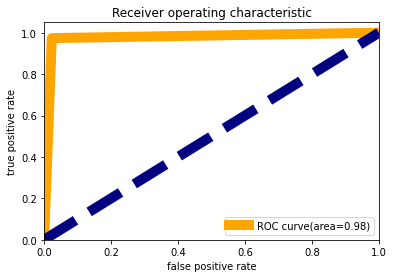

In [71]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color="orange",lw=10,label="ROC curve(area=%0.2f)"%roc_auc)
plt.plot([0,1],[0,1],color="navy",lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

Observation on Auc_Roc curve


*   The curve shows the model is Performing well with god accuracy
*   ROC curve = **0.98**




#Final Accuracy

In [69]:
from sklearn.ensemble import RandomForestClassifier
svm = LinearSVC(random_state=6,C=1.0,loss='squared_hinge',penalty='l2',max_iter=8)
svm.fit(x_train,y_train)
pred_train=svm.predict(x_train)
pred_test=svm.predict(x_test)
print("Final training accuracy score  :",accuracy_score(y_train,pred_train)*100)
print("Final testing accuracy score  :",accuracy_score(y_test,pred_test)*100)


Final training accuracy score  : 99.95214656822532
Final testing accuracy score  : 97.56631118403062


#Saving the model

In [70]:
import pickle
filename="fake news prediction.pkl"
pickle.dump(svm,open(filename,"wb"))

#Conclusion

In [72]:
import numpy as np
a=np.array(y_test)
predicted=np.array(svm.predict(x_test))
df_con=pd.DataFrame({"original":a,"Predicted":predicted})
df_con.head(10)

,original,Predicted
0,1,1
1,1,1
2,0,0
3,0,0
4,0,0
5,1,1
6,0,0
7,0,0
8,0,0
9,0,0


Observation

* We see the original and the predicted values are equal with high accuracy.
* This concludes that the model is performing well and shows high level f prediction